### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import cm
import warnings
import lazypredict
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split , GridSearchCV
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,confusion_matrix,classification_report
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer ,make_column_selector
from sklearn import set_config
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.exceptions import NotFittedError
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import pickle
import joblib
import os

### Dataset

In [31]:
df=pd.read_csv(r"C:\Users\MISTY ROY\OneDrive\Desktop\Pythonfiles_vscode\Projects\ML_finance\initial_pipeline\credit_card_churn.csv")
# df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
#        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)
df.columns = df.columns.str.replace('_', ' ', regex=False)
df.head()

,CLIENTNUM,Attrition Flag,Customer Age,Gender,Dependent count,Education Level,Marital Status,Income Category,Card Category,Months on book,...,Months Inactive 12 mon,Contacts Count 12 mon,Credit Limit,Total Revolving Bal,Avg Open To Buy,Total Amt Chng Q4 Q1,Total Trans Amt,Total Trans Ct,Total Ct Chng Q4 Q1,Avg Utilization Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


In [32]:
df.columns

Index(['CLIENTNUM', 'Attrition Flag', 'Customer Age', 'Gender',
       'Dependent count', 'Education Level', 'Marital Status',
       'Income Category', 'Card Category', 'Months on book',
       'Total Relationship Count', 'Months Inactive 12 mon',
       'Contacts Count 12 mon', 'Credit Limit', 'Total Revolving Bal',
       'Avg Open To Buy', 'Total Amt Chng Q4 Q1', 'Total Trans Amt',
       'Total Trans Ct', 'Total Ct Chng Q4 Q1', 'Avg Utilization Ratio'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition Flag            10127 non-null  object 
 2   Customer Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent count           10127 non-null  int64  
 5   Education Level           10127 non-null  object 
 6   Marital Status            10127 non-null  object 
 7   Income Category           10127 non-null  object 
 8   Card Category             10127 non-null  object 
 9   Months on book            10127 non-null  int64  
 10  Total Relationship Count  10127 non-null  int64  
 11  Months Inactive 12 mon    10127 non-null  int64  
 12  Contacts Count 12 mon     10127 non-null  int64  
 13  Credit Limit              10127 non-null  float64
 14  Total 

In [34]:
df['Card Category'].value_counts()

Card Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

### EDA

#### Shape and basic info

In [35]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition Flag            10127 non-null  object 
 2   Customer Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent count           10127 non-null  int64  
 5   Education Level           10127 non-null  object 
 6   Marital Status            10127 non-null  object 
 7   Income Category           10127 non-null  object 
 8   Card Category             10127 non-null  object 
 9   Months on book            10127 non-null  int64  
 10  Total Relationship Count  10127 non-null  int64  
 11  Months Inactive 12 mon    10127 non-null  int64  
 12  Contacts Count 12 mon     10127 non-null  int64  
 13  Credit Limit              10127 non-null  float64
 14  Total 

In [36]:
if (df.duplicated().sum()==0):
    print("There are no duplicate rows in the dataset")
else:
    print(f"There are {df.duplicated().sum()} duplicate rows in the dataset")

There are no duplicate rows in the dataset


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
Customer Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months on book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total Relationship Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months Inactive 12 mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts Count 12 mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total Revolving Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg Open To Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00


In [38]:
def category_unique_value(data):
    Categorical_columns=data.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    for cat_cols in Categorical_columns:
        print("Unique values and corresponding data counts for feature: " + cat_cols)
        df_temp = pd.concat(
            [
                data[cat_cols].value_counts(),
                data[cat_cols].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)
category_unique_value(df)

Unique values and corresponding data counts for feature: Attrition Flag
                   Count  Percentage
Attrition Flag                      
Existing Customer   8500       83.93
Attrited Customer   1627       16.07
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
        Count  Percentage
Gender                   
F        5358       52.91
M        4769       47.09
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Education Level
                 Count  Percentage
Education Level                   
Graduate          3128       30.89
High School       2013       19.88
Unknown           1519       15.00
Uneducated        1487       14.68
College           1013       10.00
Post-Graduate      516        5.10
Doctorate          451        4.45
------------------------------------------

#### Bivariate data analysis

##### Categorical data

In [39]:
def cat_view(data: pd.DataFrame, x, target):
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    s = data.groupby(x).size()
    values = s.values.tolist()
    index = s.index.tolist()
    total=sum(s)
    explode = [0.6 if size / total < 0.01 else 0 for size in s]
    wedges, texts, autotexts = ax[0].pie(
        values,
        autopct='%1.1f%%',
        explode=explode
    )
    
    ax[0].legend(
        wedges,
        index,
        title=x.capitalize(),
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
    )

    plt.setp(autotexts, size=12)

    ax[0].set_title(f"{x.capitalize()} Pie Chart")

    df1= pd.pivot_table(
        data, index=[x], columns=[target], values=["Credit Limit"], aggfunc=len
    )

    labels = df1.index.tolist()
    no = df1.values[:, 1].tolist()
    yes = df1.values[:, 0].tolist()

    l = np.arange(len(labels))  
    width = 0.35

    rects1 = ax[1].bar(
        l - width / 2, no, width, label="Existing Customer"
    )
    rects2 = ax[1].bar(
        l + width / 2, yes, width, label="Attrited Customer"
    )

    ax[1].set_ylabel("Count")
    ax[1].set_title(f"{x.capitalize()} Bar Graph")
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()

    def autolabel(rects):

        for rect in rects:
            height = rect.get_height()
            ax[1].annotate(
                "{}".format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                fontsize="medium",
                ha="center",
                va="bottom",
            )

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

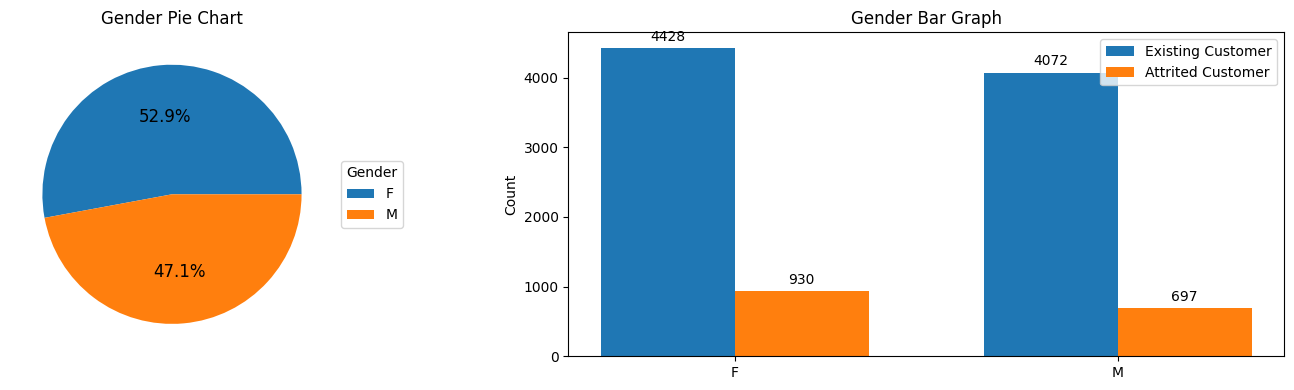

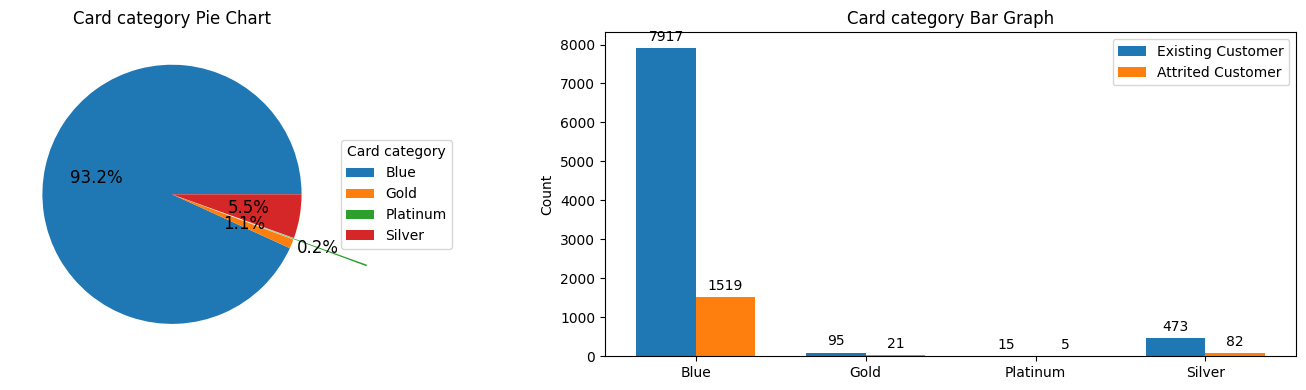

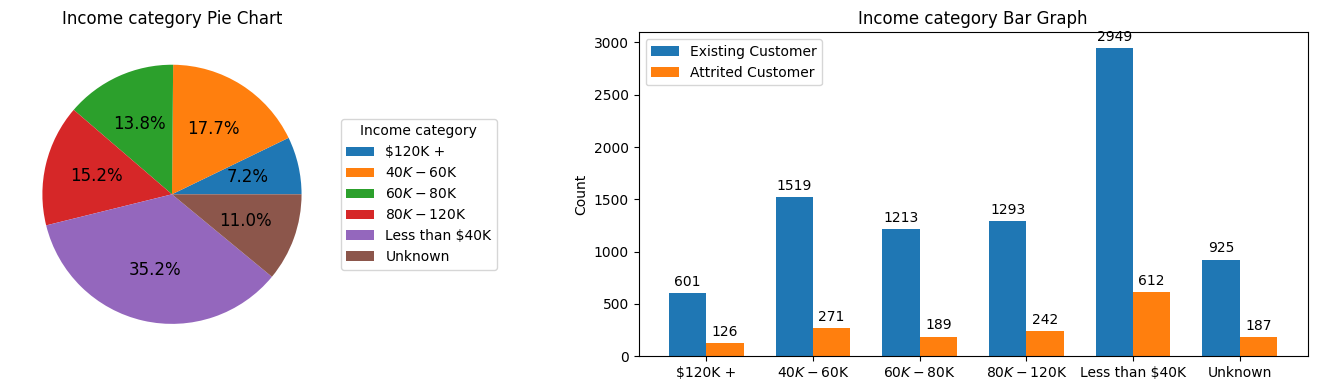

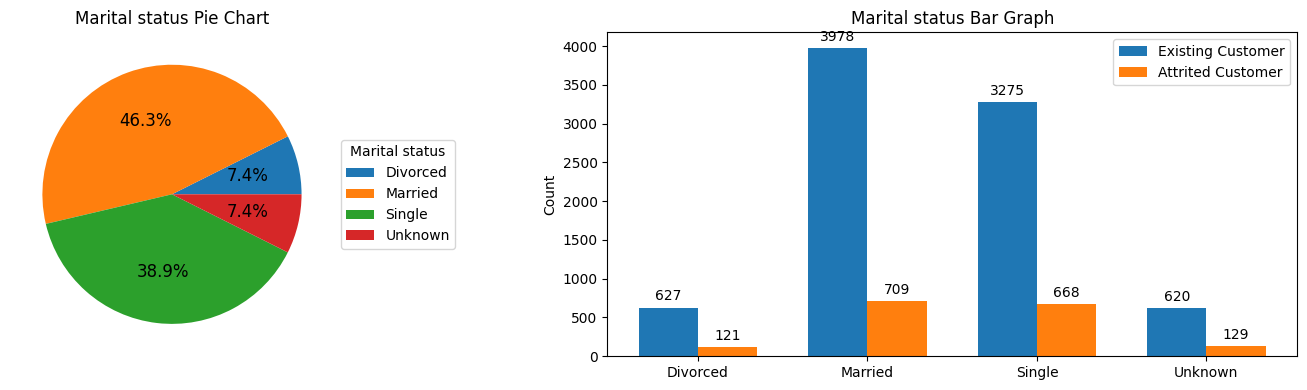

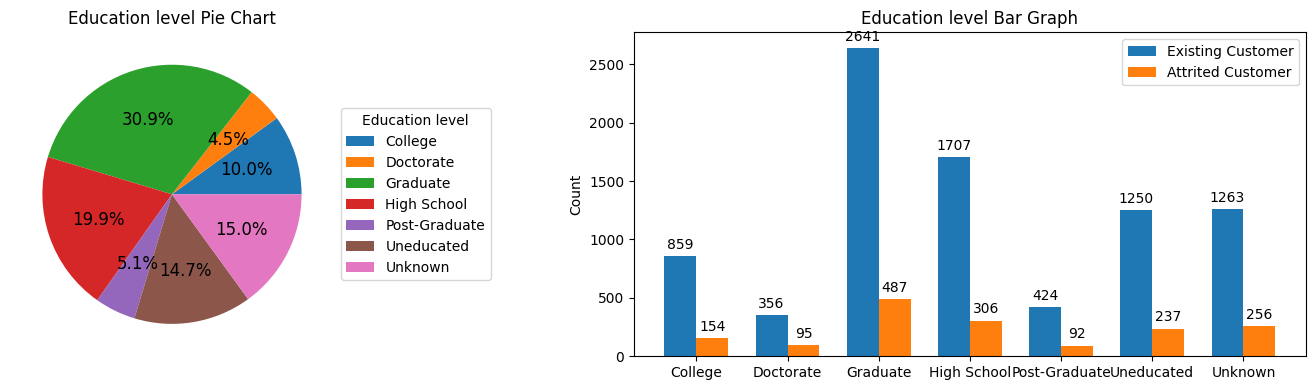

In [40]:
cat_view(df, "Gender", "Attrition Flag")
cat_view(df, "Card Category", "Attrition Flag")
cat_view(df, "Income Category", "Attrition Flag")
cat_view(df, "Marital Status", "Attrition Flag")
cat_view(df, "Education Level", "Attrition Flag")

In [41]:
def stackked_bar_plot(data,x,target):
    sns.set(palette="tab10")
    tab = pd.crosstab(data[x], data[target], normalize="index")

    tab.plot.bar(stacked=True, figsize=(10, 4))
    plt.title(x.capitalize() + " Stacked Bar Plot")
    plt.legend(loc="upper right", bbox_to_anchor=(0, 1))
    plt.show()

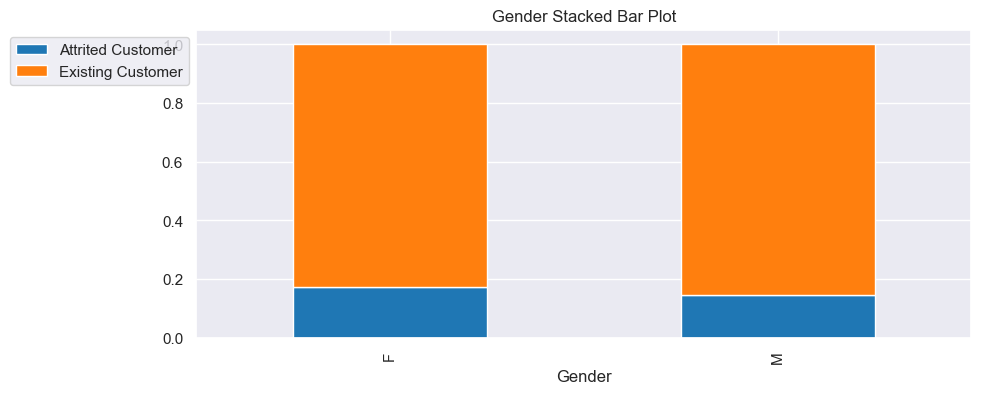

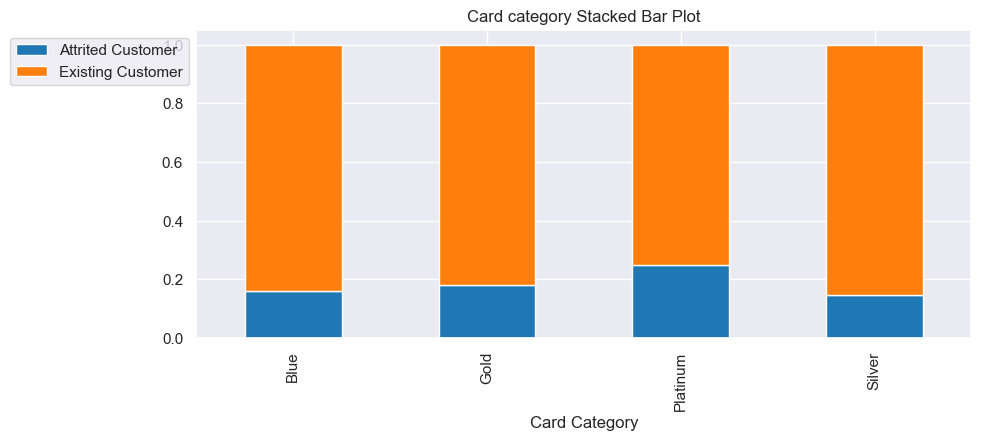

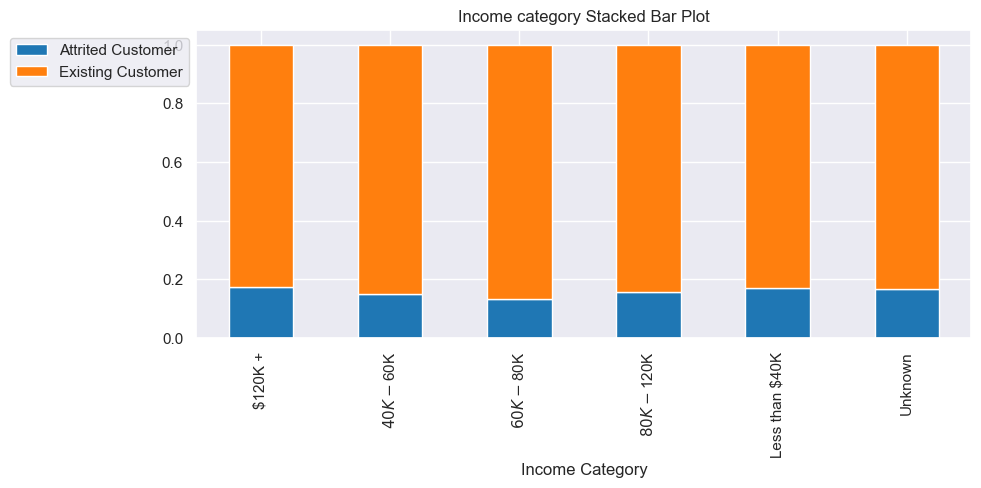

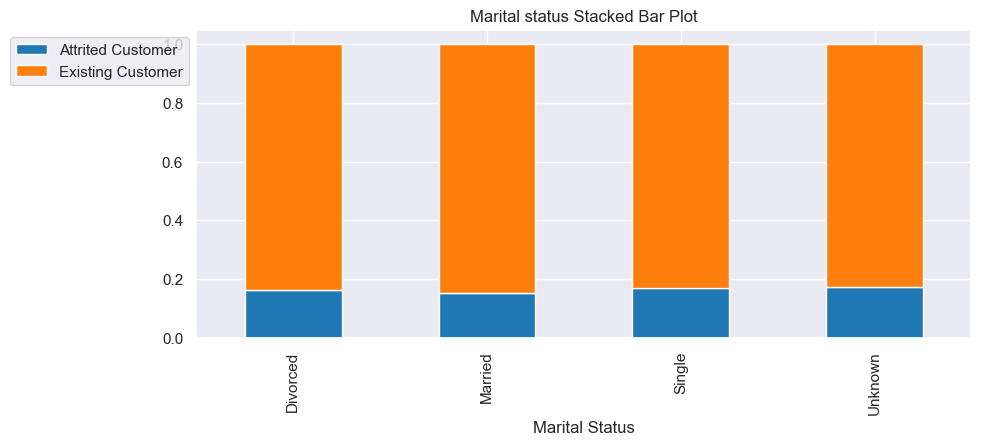

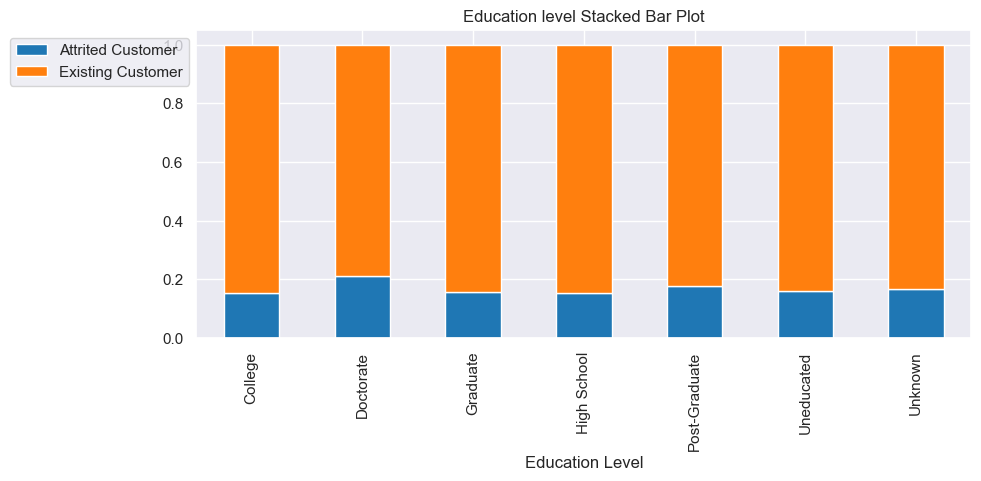

In [42]:
stackked_bar_plot(df, "Gender", "Attrition Flag")
stackked_bar_plot(df, "Card Category", "Attrition Flag")
stackked_bar_plot(df, "Income Category", "Attrition Flag")
stackked_bar_plot(df, "Marital Status", "Attrition Flag")
stackked_bar_plot(df, "Education Level", "Attrition Flag")

##### Numerical data

In [43]:
def box_by_target(data: pd.DataFrame, numeric_columns, target, include_outliers):
    subplot_cols = 2
    x=int(len(numeric_columns) / 2 + 1)
    plt.figure(figsize=(16, 3 * x))
    for i, col in enumerate(numeric_columns):
        plt.subplot(x, 2, i + 1)
        sns.boxplot(
            data=data,
            x=target,
            y=col,
            orient="vertical",
            palette="Blues",
            showfliers=include_outliers,
        )
        plt.tight_layout()
        plt.title( target + " vs. " + col, color="black")
    plt.show()

Without Outliers


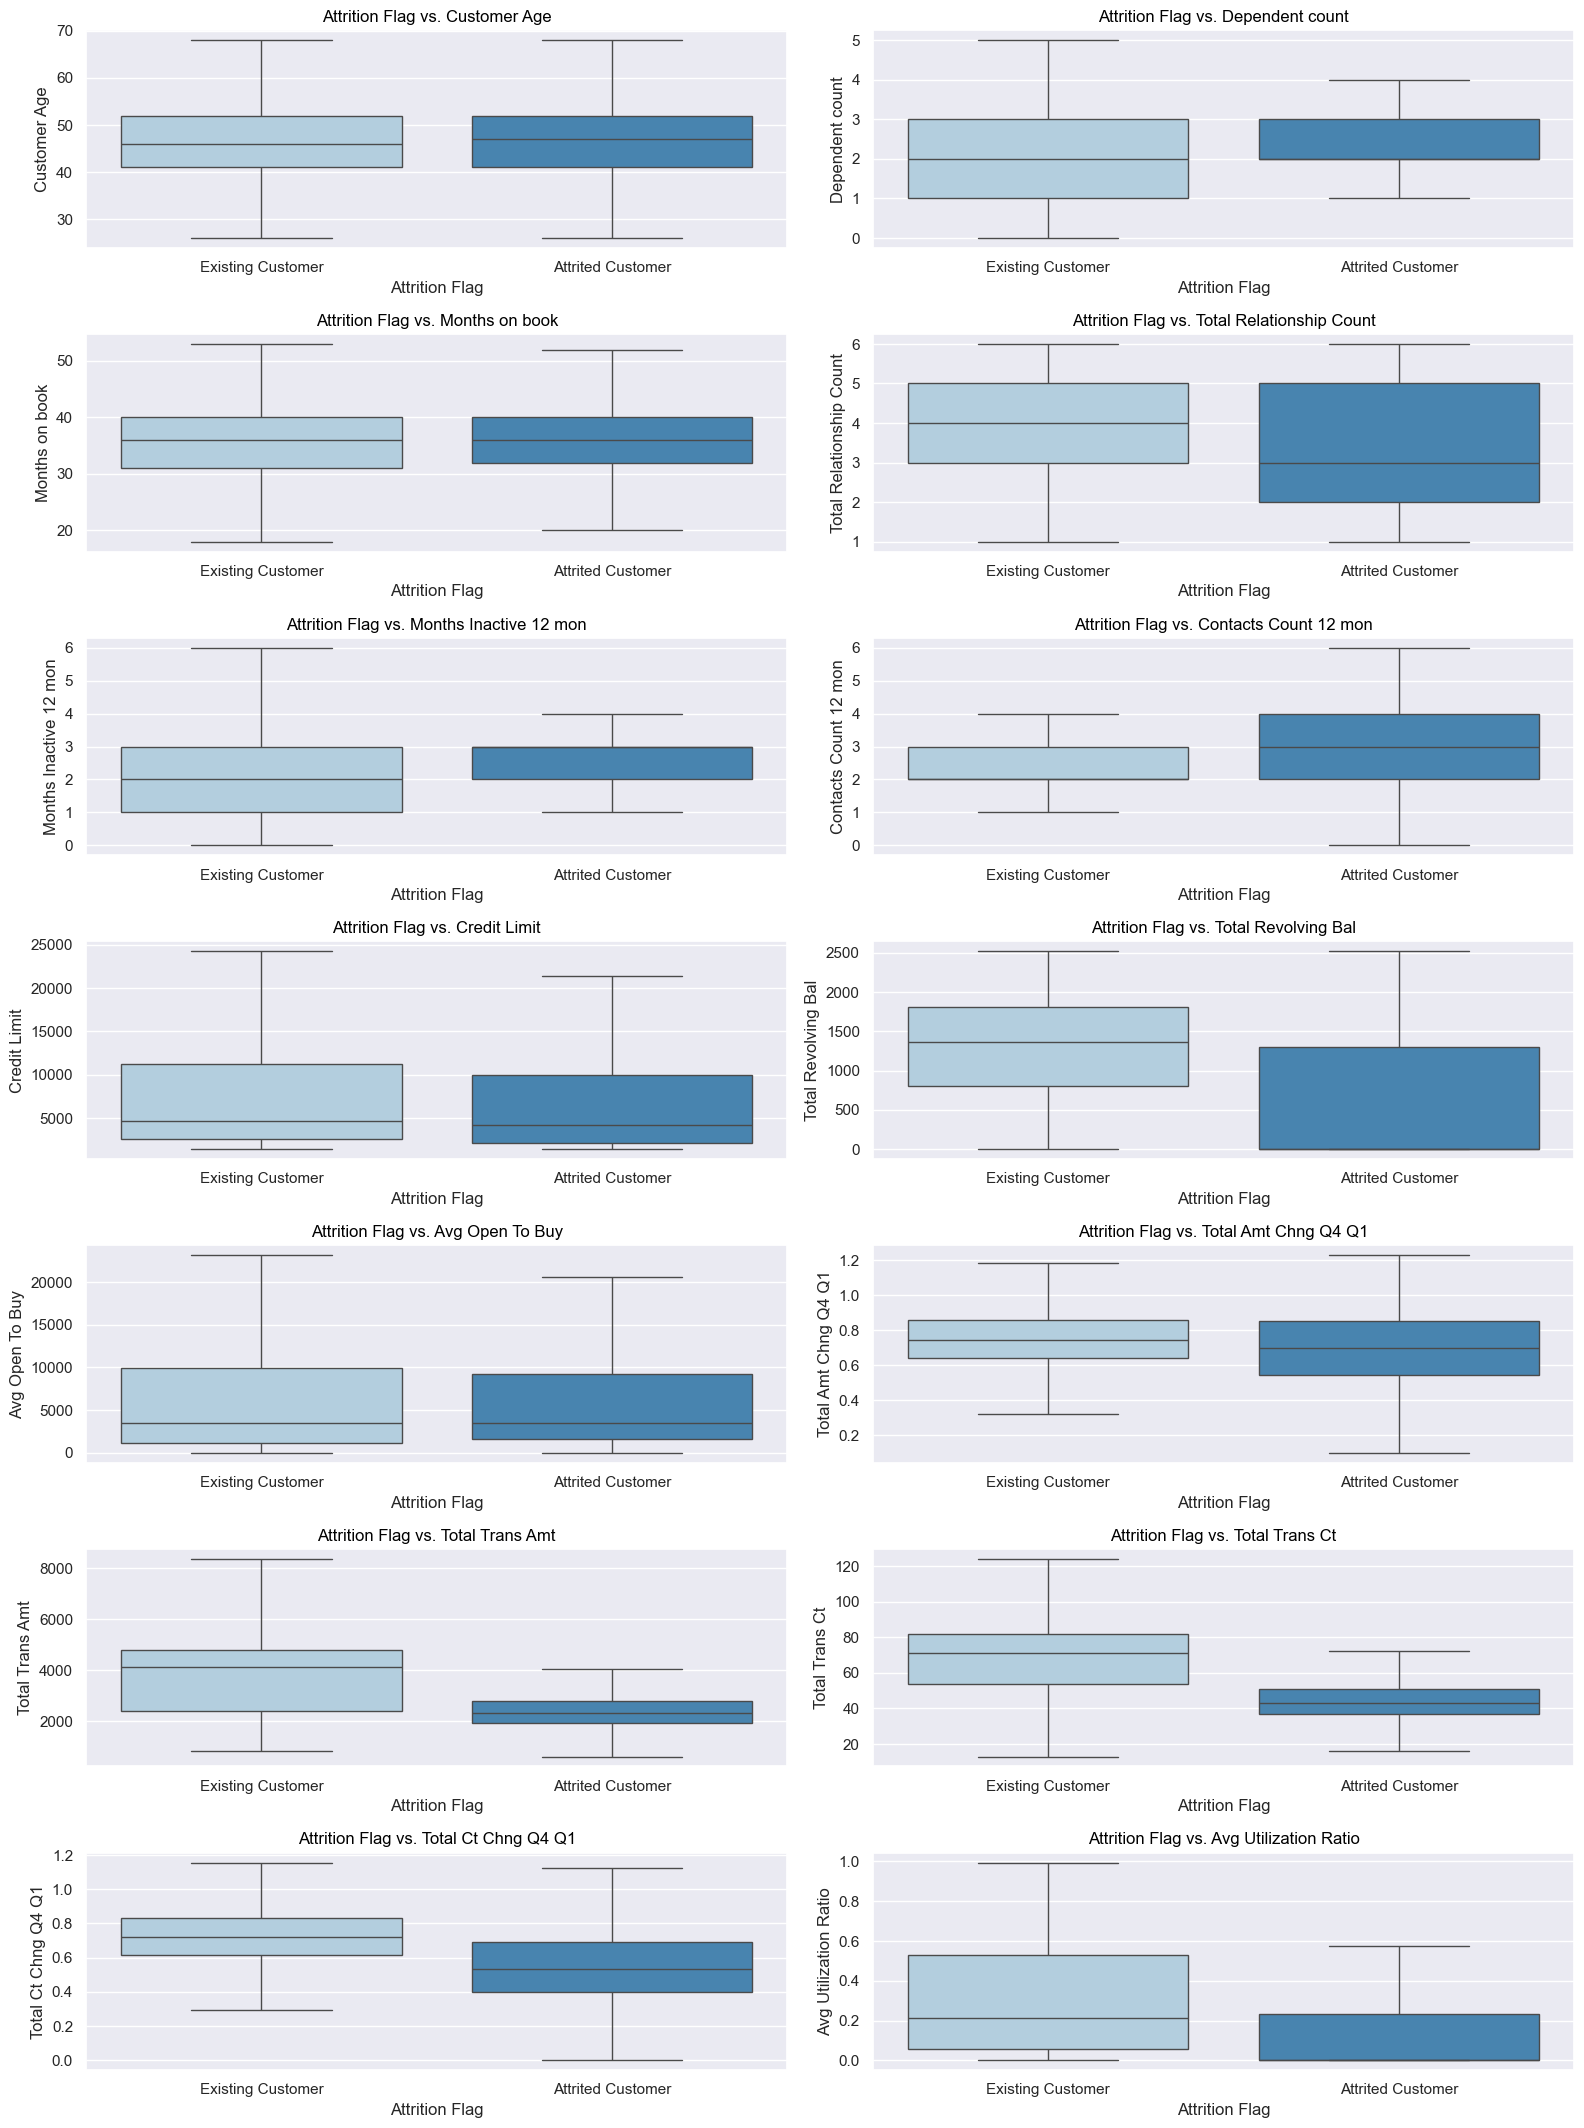

In [44]:
numeric_columns = df.select_dtypes(exclude="object").columns.tolist()
numeric_columns=numeric_columns[1:]
print("Without Outliers")
box_by_target(df,numeric_columns,"Attrition Flag",False)

##### Correlation heatmap

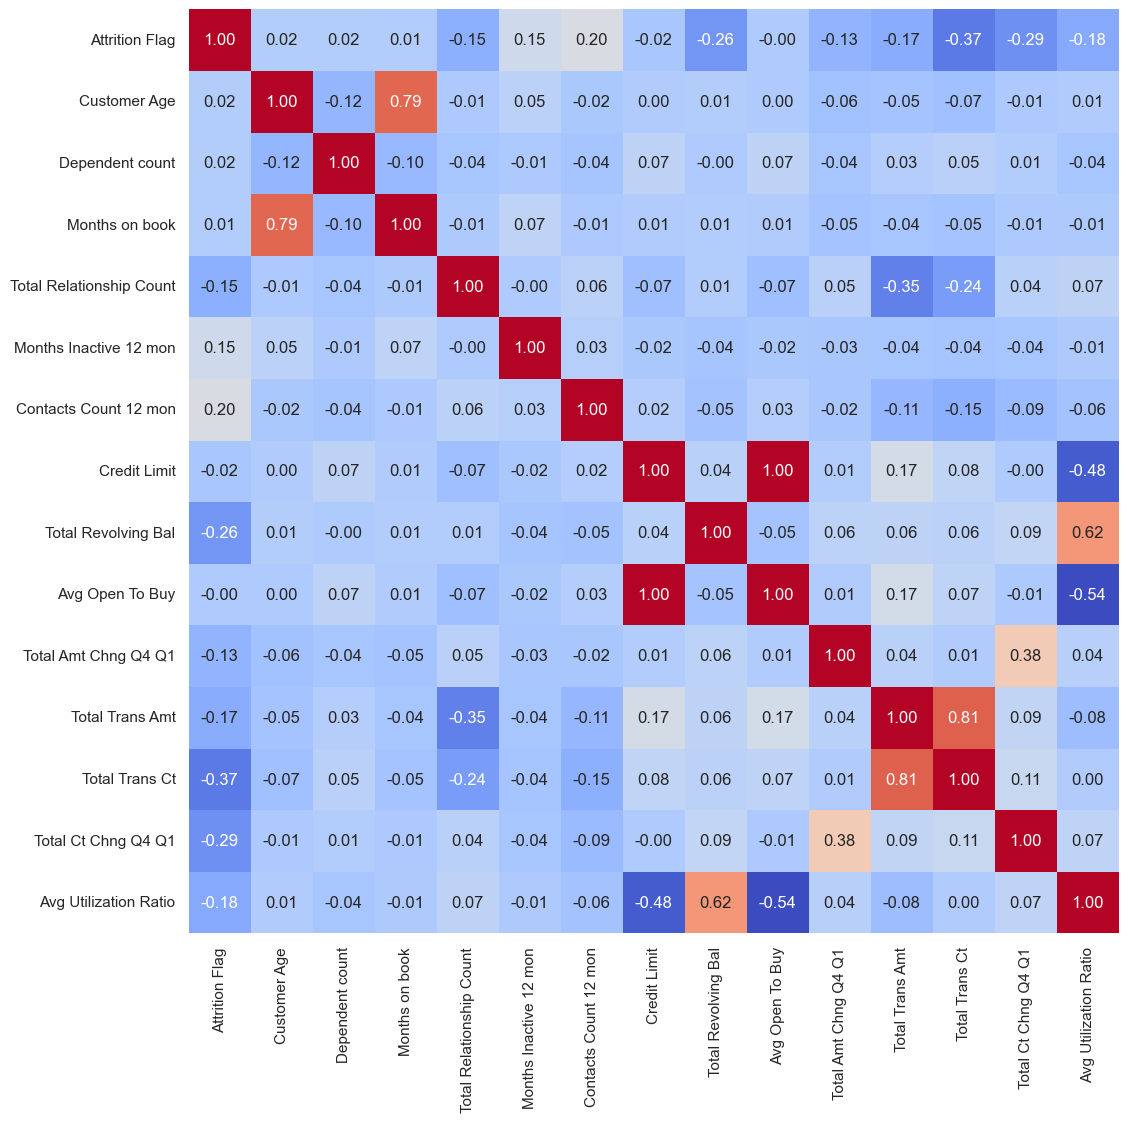

In [45]:
codes = {'Existing Customer':0, 'Attrited Customer':1}
data_clean = df.drop(columns=["Gender","Education Level","Marital Status","Income Category","Card Category","CLIENTNUM"])
data_clean['Attrition Flag'] = data_clean['Attrition Flag'].map(codes).astype(int)


sns.set(rc={"figure.figsize": (12, 12)})
sns.heatmap(
    data_clean.corr(),
    annot=True,
    cbar=False,
    cmap="coolwarm",
    fmt="0.2f",
)
plt.show()

### Final datset 

In [46]:
list1=df.columns
list2=['Total Relationship Count','Attrition Flag','Total Relationship Count', 'Months Inactive 12 mon',
       'Contacts Count 12 mon','Total Revolving Bal','Dependent count', 'Education Level', 'Marital Status',
       'Avg Open To Buy', 'Total Amt Chng Q4 Q1', 'Total Trans Amt', 'Income Category', 'Card Category', 'Months on book'
       'Total Trans Ct', 'Total Ct Chng Q4 Q1', 'Avg Utilization Ratio' ]
difference = list(set(list1) - set(list2))
df.drop(columns=difference,inplace=True)

In [47]:
X=df.iloc[:,1:17]
Y=df.iloc[:,0]
mapping={'Existing Customer':0,"Attrited Customer":1}
Y=Y.map(mapping)
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]), make_column_selector(dtype_include=object)),  
            ('num', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]), make_column_selector(dtype_include='number')) 
        ]
    ))
])

pipeline.fit(X)
X = pipeline.transform(X)

In [48]:
X.shape

(10127, 31)

In [49]:
Y.shape

(10127,)

### Model Selection

In [50]:
lazy_clf = LazyClassifier(verbose=0)

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(x_train.shape,
x_test.shape)

(8101, 31) (2026, 31)


In [52]:
models = lazy_clf.fit(x_train, x_test, y_train, y_test)
models

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1300, number of negative: 6801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1620
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160474 -> initscore=-1.654705
[LightGBM] [Info] Start training from score -1.654705


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 LGBMClassifier                     0.95               0.89     0.89      0.95   
 XGBClassifier                      0.95               0.88     0.88      0.95   
 BaggingClassifier                  0.93               0.85     0.85      0.93   
 DecisionTreeClassifier             0.91               0.83     0.83      0.91   
 RandomForestClassifier             0.93               0.82     0.82      0.93   
 AdaBoostClassifier                 0.91               0.78     0.78      0.90   
 NearestCentroid                    0.75               0.73     0.73      0.78   
 ExtraTreesClassifier               0.90               0.73     0.73      0.89   
 PassiveAggressiveClassifier        0.83               0.70     0.70      0.83   
 SVC                                0.88               0.69     0.69      0.87   
 Perceptron     

### Smote

In [53]:
smote = SMOTE(sampling_strategy='minority') 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_res, y_res = smote.fit_resample(x_train, y_train)
print(X_res.shape,
x_test.shape)

(13602, 31) (2026, 31)


In [54]:
lazy_clf = LazyClassifier()
models = lazy_clf.fit(X_res, x_test, y_res, y_test)

models

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 6801, number of negative: 6801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7030
[LightGBM] [Info] Number of data points in the train set: 13602, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 LGBMClassifier                     0.95               0.91     0.91      0.95   
 XGBClassifier                      0.95               0.90     0.90      0.95   
 BaggingClassifier                  0.93               0.88     0.88      0.93   
 AdaBoostClassifier                 0.89               0.87     0.87      0.90   
 RandomForestClassifier             0.94               0.87     0.87      0.94   
 DecisionTreeClassifier             0.91               0.86     0.86      0.91   
 ExtraTreesClassifier               0.91               0.76     0.76      0.90   
 SVC                                0.87               0.76     0.76      0.87   
 BernoulliNB                        0.79               0.76     0.76      0.81   
 RidgeClassifier                    0.78               0.75     0.75      0.80   
 LinearDiscrimin

### Undersampling

In [55]:
rus = RandomUnderSampler(random_state=42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train_un, y_train_un = rus.fit_resample(x_train, y_train)
print(X_train_un.shape,y_train_un.shape)
lazy_clf = LazyClassifier()
models = lazy_clf.fit(X_train_un, x_test, y_train_un, y_test)

models

(2600, 31) (2600,)


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1300, number of negative: 1300
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1620
[LightGBM] [Info] Number of data points in the train set: 2600, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 LGBMClassifier                     0.93               0.93     0.93      0.93   
 XGBClassifier                      0.92               0.92     0.92      0.93   
 BaggingClassifier                  0.92               0.91     0.91      0.92   
 RandomForestClassifier             0.92               0.91     0.91      0.92   
 AdaBoostClassifier                 0.89               0.90     0.90      0.90   
 DecisionTreeClassifier             0.88               0.86     0.86      0.89   
 ExtraTreesClassifier               0.88               0.85     0.85      0.88   
 NuSVC                              0.80               0.78     0.78      0.82   
 SVC                                0.80               0.78     0.78      0.82   
 BernoulliNB                        0.78               0.75     0.75      0.80   
 LinearDiscrimin

### Model selection over Recall

In [56]:
model_raw=[ "LGBMClassifier" ,"XGBClassifier", "RandomForestClassifier", "BaggingClassifier",
 "AdaBoostClassifier" , "ExtraTreesClassifier ", "DecisionTreeClassifier","SVC", "KNeighborsClassifier"]
model_smote=["LGBMClassifier","XGBClassifier","RandomForestClassifier","BaggingClassifier",
"AdaBoostClassifier","ExtraTreesClassifier" ,"DecisionTreeClassifier" ,"SVC","KNeighborsClassifier"]
model_downsampling=["XGBClassifier","LGBMClassifier","RandomForestClassifier","ExtraTreesClassifier","BaggingClassifier","AdaBoostClassifier","DecisionTreeClassifier"]

In [57]:
final_model=set(model_raw) & set( model_smote) & set(model_downsampling)
print(final_model)

{'RandomForestClassifier', 'XGBClassifier', 'BaggingClassifier', 'LGBMClassifier', 'DecisionTreeClassifier', 'AdaBoostClassifier'}


In [58]:
pipelines = {
    'xgboost': make_pipeline(XGBClassifier()),
    'rf':make_pipeline(RandomForestClassifier(random_state=42)),
    'lgbm':make_pipeline(LGBMClassifier(random_state=42)),
    'adaboost':make_pipeline(AdaBoostClassifier(random_state=42)),
    'dt':make_pipeline(DecisionTreeClassifier(random_state=42))
}

#### Raw

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

for algo, model in pipelines.items():
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))
    yhat = model.predict(X_test)
    report=classification_report(y_test,yhat,target_names=["Existing Customer","Attrited Customer"])
    print("report for {} is \n{}".format(algo,report))
    print("--------------")

Starting training for xgboost.
xgboost has been successfully fit.
report for xgboost is 
                   precision    recall  f1-score   support

Existing Customer       0.97      0.98      0.98      1695
Attrited Customer       0.89      0.86      0.87       331

         accuracy                           0.96      2026
        macro avg       0.93      0.92      0.92      2026
     weighted avg       0.96      0.96      0.96      2026

--------------
Starting training for rf.
rf has been successfully fit.
report for rf is 
                   precision    recall  f1-score   support

Existing Customer       0.95      0.99      0.97      1695
Attrited Customer       0.92      0.75      0.83       331

         accuracy                           0.95      2026
        macro avg       0.94      0.87      0.90      2026
     weighted avg       0.95      0.95      0.95      2026

--------------
Starting training for lgbm.
[LightGBM] [Info] Number of positive: 1296, number of negative: 6

### Smote

In [60]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
X_res, y_res = smote.fit_resample(x_train, y_train)
for algo, model in pipelines.items():
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_res, y_res)
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))
    yhat = model.predict(x_test)
    report=classification_report(y_test,yhat,target_names=["Existing Customer","Attrited Customer"])
    print("report for {} is \n{}".format(algo,report))
    print("------------")

Starting training for xgboost.
xgboost has been successfully fit.
report for xgboost is 
                   precision    recall  f1-score   support

Existing Customer       0.97      0.97      0.97      1695
Attrited Customer       0.86      0.86      0.86       331

         accuracy                           0.95      2026
        macro avg       0.92      0.92      0.92      2026
     weighted avg       0.95      0.95      0.95      2026

------------
Starting training for rf.
rf has been successfully fit.
report for rf is 
                   precision    recall  f1-score   support

Existing Customer       0.96      0.97      0.97      1695
Attrited Customer       0.84      0.81      0.82       331

         accuracy                           0.94      2026
        macro avg       0.90      0.89      0.90      2026
     weighted avg       0.94      0.94      0.94      2026

------------
Starting training for lgbm.
[LightGBM] [Info] Number of positive: 6805, number of negative: 6805


### Undersampled

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
X_train_un, y_train_un = rus.fit_resample(x_train, y_train)
for algo, model in pipelines.items():
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train_un, y_train_un)
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))
    yhat = model.predict(x_test)
    report=classification_report(y_test,yhat,target_names=["Existing Customer","Attrited Customer"])
    print("report for {} is \n{}".format(algo,report))
    print("------------")

Starting training for xgboost.
xgboost has been successfully fit.
report for xgboost is 
                   precision    recall  f1-score   support

Existing Customer       0.99      0.92      0.95      1695
Attrited Customer       0.69      0.94      0.79       331

         accuracy                           0.92      2026
        macro avg       0.84      0.93      0.87      2026
     weighted avg       0.94      0.92      0.92      2026

------------
Starting training for rf.
rf has been successfully fit.
report for rf is 
                   precision    recall  f1-score   support

Existing Customer       0.98      0.91      0.95      1695
Attrited Customer       0.67      0.92      0.77       331

         accuracy                           0.91      2026
        macro avg       0.83      0.91      0.86      2026
     weighted avg       0.93      0.91      0.92      2026

------------
Starting training for lgbm.
[LightGBM] [Info] Number of positive: 1296, number of negative: 1296


### Final model run

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)
x_train_un, y_train_un = rus.fit_resample(x_train, y_train)
print(x_train_un.shape)
print(x_test.shape)
print(y_train_un.shape)
print("number of churners in train data :" ,y_train_un[y_train_un==1].count())
print("number of churners in test data :", y_test[y_test==1].count())

(2898, 31)
(1013, 31)
(2898,)
number of churners in train data : 1449
number of churners in test data : 178


In [63]:
def metric_evaluation(x,y):
    accuracy=accuracy_score(x,y)
    con_matrix= confusion_matrix(x,y)
    report=classification_report(x,y,target_names=["Existing Customer","Attrited Customer"])
    print("accuracy:",accuracy)
    print(con_matrix)
    print(report)

In [64]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(random_state=42)
}

param_grid = {
    'RandomForest': {
        'n_estimators': [50, 75, 100, 125, 150],
        'max_depth': [None, 5, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 6, 8]
    },
    'XGBoost': {
        'n_estimators': [75,80,85],
        'max_depth': [ 3, 5, 7, 9, 11],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [50, 75],
        'max_depth': [10, 15, 20],
        'learning_rate': [ 0.1, 0.15, 0.2],
        'num_leaves': [31, 63],
        'min_child_samples': [ 10,15,20,25]
    }
}

best_models = {}

for model_name, model in models.items():
    model=GridSearchCV(estimator=model,param_grid=param_grid[model_name],cv=9,verbose=2,n_jobs=-1,scoring='recall')
    model.fit(x_train_un,y_train_un)
    print("{} has been successfully fitted".format(model_name))
    best_model_parameter = model.best_params_
    best_models[model_name] = model.best_estimator_
    print("Best Estimator:", best_model_parameter)
    print("Here are the evaluation of the model")
    print("------------------")

    yhat= model.predict(x_test)
    metric_evaluation(y_test,yhat)

print(best_models)

Fitting 9 folds for each of 600 candidates, totalling 5400 fits
RandomForest has been successfully fitted
Best Estimator: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Here are the evaluation of the model
------------------
accuracy: 0.9239881539980257
[[768  67]
 [ 10 168]]
                   precision    recall  f1-score   support

Existing Customer       0.99      0.92      0.95       835
Attrited Customer       0.71      0.94      0.81       178

         accuracy                           0.92      1013
        macro avg       0.85      0.93      0.88      1013
     weighted avg       0.94      0.92      0.93      1013

Fitting 9 folds for each of 405 candidates, totalling 3645 fits
XGBoost has been successfully fitted
Best Estimator: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 80, 'subsample': 1.0}
Here are the evaluation of the model
------------------
accuracy: 0.9249753208292202
[[764  71]
 [  5 173]

### Using stacking

In [65]:
base_learners = [
    ('rf', RandomForestClassifier(min_samples_split=5, n_estimators=75, random_state=42)),
    ('xg', XGBClassifier(colsample_bytree= 0.6, learning_rate= 0.05, max_depth= 9, n_estimators= 80, subsample= 0.8)),
    ('LightGBM', LGBMClassifier(learning_rate=0.15, max_depth=10, n_estimators=75,random_state=42))
]
meta_learner = LogisticRegression()
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5)

stacked_model.fit(x_train_un, y_train_un)
y_pred = stacked_model.predict(x_test)
print(classification_report(y_test, y_pred, target_names=["Existing Customer","Attrited Customer"]))

[LightGBM] [Info] Number of positive: 1449, number of negative: 1449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 2898, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1159, number of negative: 1159
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 2318, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1159, number of

In [66]:
print(confusion_matrix(y_test,y_pred))

[[769  66]
 [  5 173]]


## LightGBM

In [3]:
df = pd.read_csv(r"C:\Users\MISTY ROY\OneDrive\Desktop\Pythonfiles_vscode\Projects\ML_finance\initial_pipeline\credit_card_churn.csv")
df.columns = df.columns.str.replace('_', ' ', regex=False)

keep_columns = [
    'Attrition Flag', 'Total Relationship Count', 'Months Inactive 12 mon',
    'Contacts Count 12 mon','Total Revolving Bal','Dependent count', 'Education Level',
    'Marital Status', 'Avg Open To Buy', 'Total Amt Chng Q4 Q1', 'Total Trans Amt',
    'Income Category', 'Card Category', 'Months on book', 'Total Trans Ct',
    'Total Ct Chng Q4 Q1', 'Avg Utilization Ratio'
]
df = df[keep_columns]

X = df.iloc[:, 1:]
Y = df.iloc[:, 0].map({'Existing Customer': 0, 'Attrited Customer': 1})

preprocessor = ColumnTransformer(transformers=[
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), make_column_selector(dtype_include=object)),

    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), make_column_selector(dtype_include='number'))
])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline.fit(X)
X_transformed = pipeline.transform(X)


x_train, x_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.1, random_state=42)
rus = RandomUnderSampler(random_state=42)
x_train_un, y_train_un = rus.fit_resample(x_train, y_train)


modelL = LGBMClassifier(random_state=42)
param_grid = {
    'n_estimators': [50],
    'max_depth': [20],
    'learning_rate': [0.2],
    'num_leaves': [31],
    'min_child_samples': [15]
}

model = GridSearchCV(estimator=modelL, param_grid=param_grid, cv=9, verbose=2, n_jobs=-1, scoring='recall')
model.fit(x_train_un, y_train_un)
best_model = model.best_estimator_


yhat = model.predict(x_test)
print("Best Estimator:", model.best_params_)
print("Classification Report:\n", classification_report(y_test, yhat))

final_pipeline = Pipeline(steps=[
    ('preprocessor', pipeline.named_steps['preprocessor']),
    ('classifier', best_model)
])


MODEL_PATH = os.path.join("..", "app", "model", "model.pkl")
os.makedirs(os.path.dirname(MODEL_PATH), exist_ok=True) 

joblib.dump(final_pipeline, MODEL_PATH)

print(f"Model pipeline saved to: {MODEL_PATH}")

Fitting 9 folds for each of 1 candidates, totalling 9 fits
[LightGBM] [Info] Number of positive: 1482, number of negative: 1482
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1758
[LightGBM] [Info] Number of data points in the train set: 2964, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Estimator: {'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 15, 'n_estimators': 50, 'num_leaves': 31}
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       868
           1       0.70      0.97      0.81       145

    accuracy                           0.94      1013
   macro avg       0.85      0.95      0.89      1013
weighted avg       0.95      0.94      0.94      1013

Model pipeline saved to: ..\app\mod